# Consider only the below columnsCorolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] and prepare a prediction model for predicting Price.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
cars = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Multiple Linear Regression\ToyotaCorolla.csv', encoding ='latin1')

In [2]:
cars.shape

(1436, 38)

In [3]:
# Selecting the specified columns
columns_to_keep = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
cars = cars[columns_to_keep]

# Display the modified dataframe with selected columns
# print(data)

In [4]:
cars.shape

(1436, 9)

In [5]:
cars.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


No Null values found

# Visualizing the data

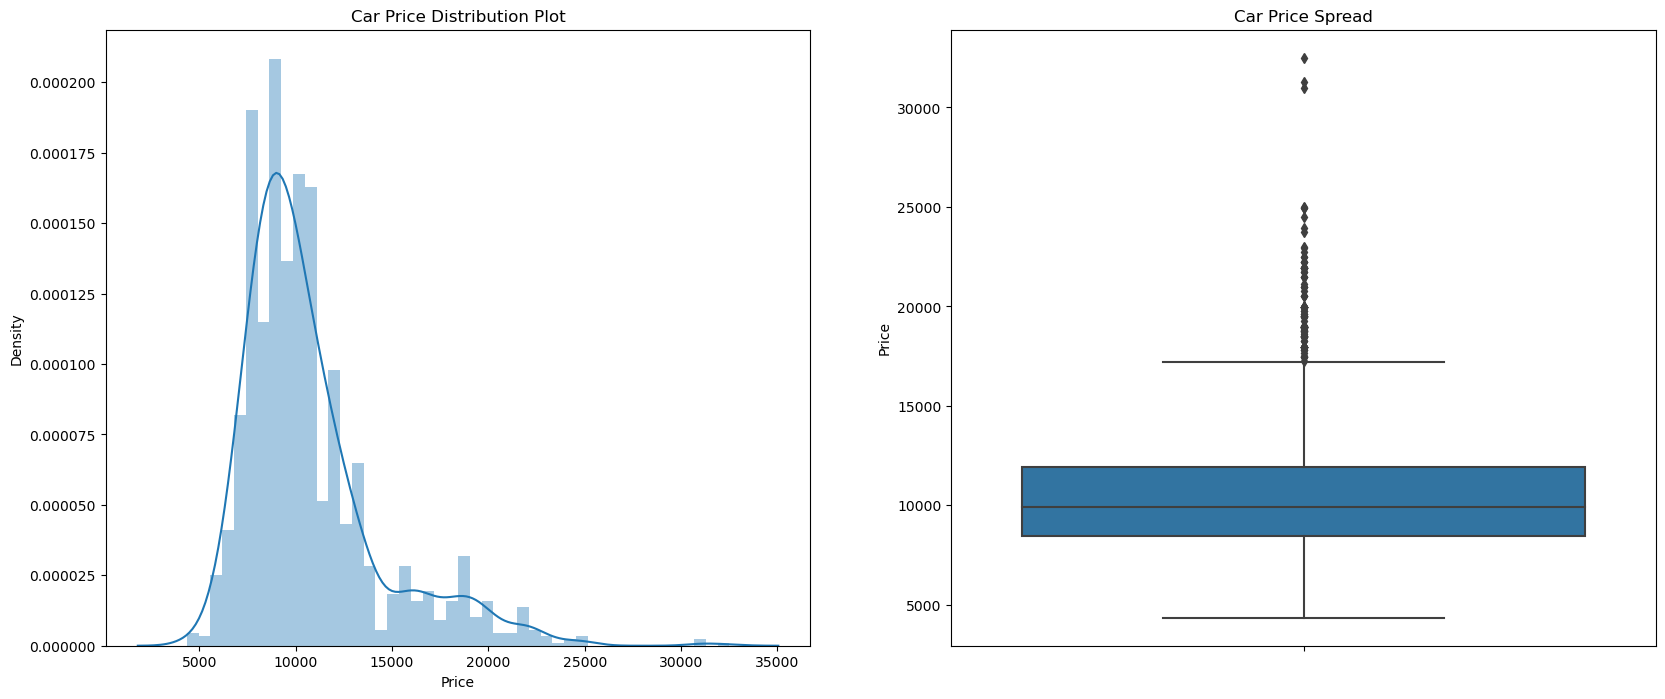

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)    # create subplots within a single figure. It specifies a 1-row, 2-column grid of subplots and 
plt.title('Car Price Distribution Plot')           # selects the first subplot (position 1).           
sns.distplot(cars.Price)     # distplot to visualize the distribution of prices

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

In [8]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
85%      13500.000000
90%      15950.000000
100%     32500.000000
max      32500.000000
Name: Price, dtype: float64


The data points are far spread out from the mean, which indicates a high variance in the car prices(90% of the prices are below 15,950, whereas the remaining 10% are between 15,950 and 32,500.)

Text(0, 0.5, 'Frequency')

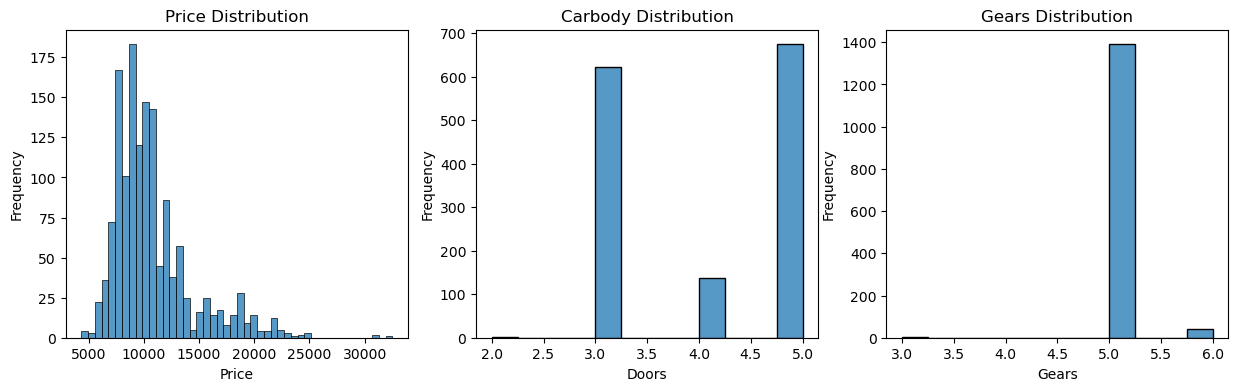

In [9]:
# Create a figure with a 1-row, 3-column grid of subplots
plt.figure(figsize=(15, 4))

# Plot in the first subplot (1, 3, 1) using Seaborn
plt.subplot(1, 3, 1)
sns.histplot(cars['Price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(cars['Doors'])
plt.title('Carbody Distribution')
plt.xlabel('Doors')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(cars['Gears'])
plt.title('Gears Distribution')
plt.xlabel('Gears')
plt.ylabel('Frequency')

1. Most Cars are in the range of Price 5000 - 10,000
2. Maximum number of Cars have 3 and 5 Doors
3. Maximum number of Cars have got 5 Gears

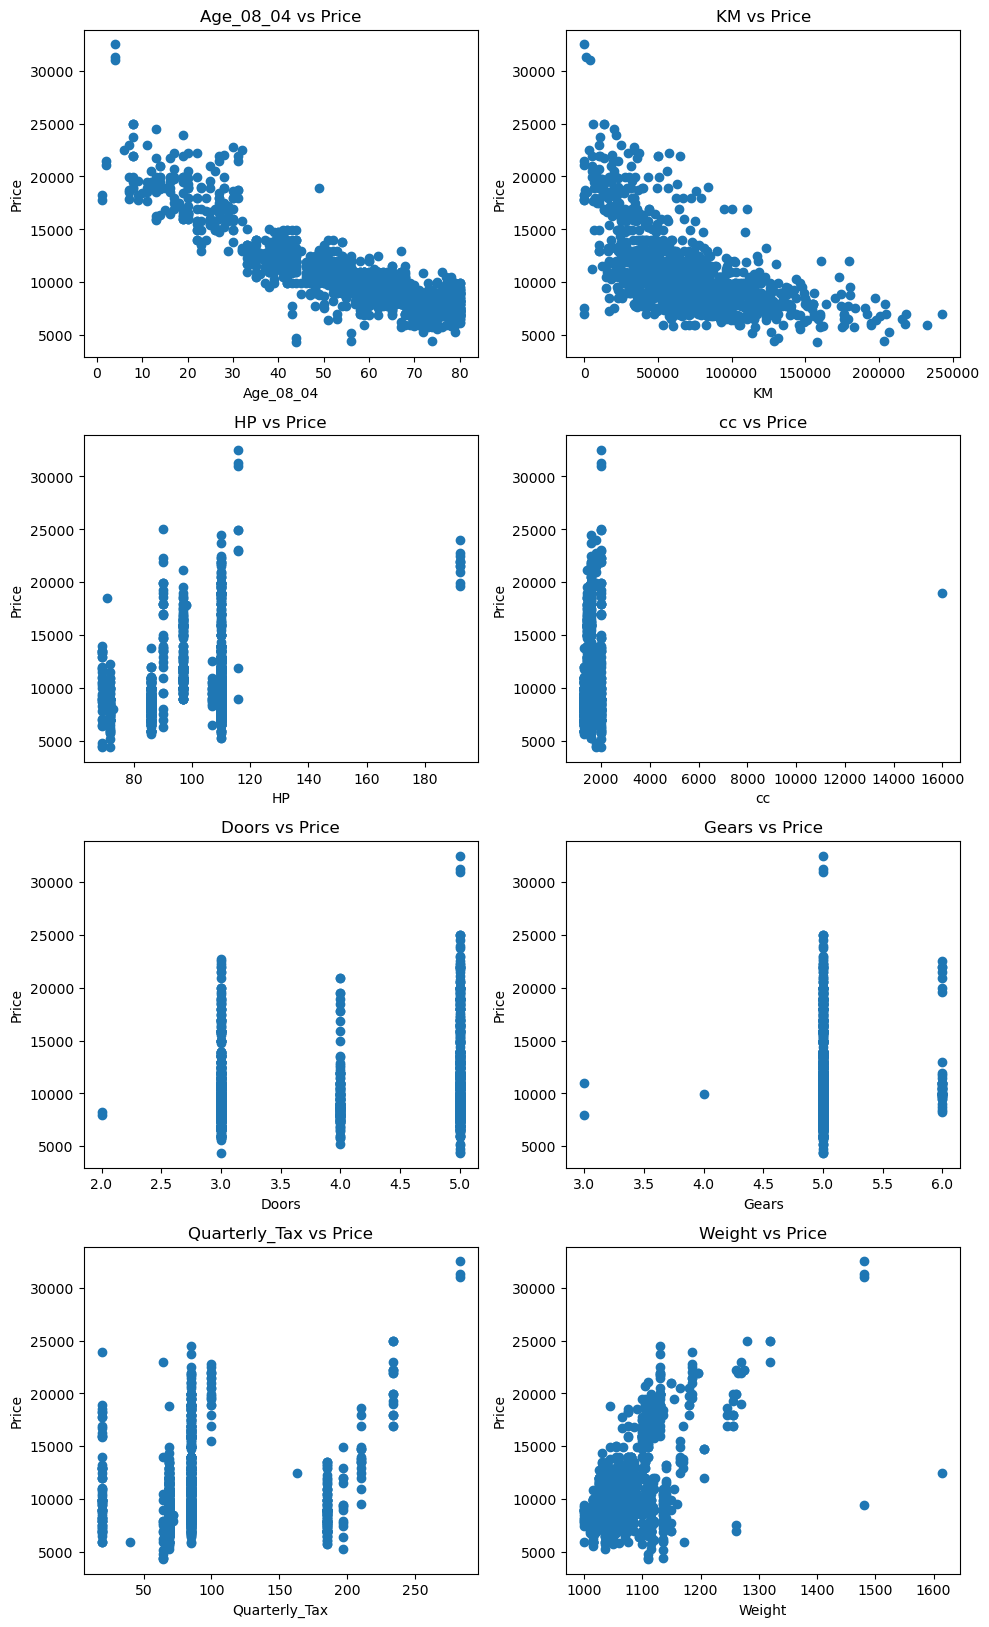

In [10]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Age_08_04', 1)
scatter('KM', 2)
scatter('HP', 3)
scatter('cc', 4)
scatter('Doors', 5)
scatter('Gears', 6)
scatter('Quarterly_Tax', 7)
scatter('Weight', 8)

plt.tight_layout()

1. Age seems to have a significant negative correlation with price.
2. KM also seem to have a significant negative correlation with price.
3. Cars with HP less than 120 tends to be more expensive as comapred with higher HP.
4. Maximum cc of the car falls under the range of 2500 and is expensive
5. Doors do not show any significant trend with the Price
6. Maximum number of cars have got 5 Gears
7. Quarterly_Tax varies with the Price
8. Maximum number of cars falls under the weight of 1200

# Matrix Correlation

In [11]:
cars.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


Gears and Weight of the Car shows some Correlation Vs Price

# Checking for Outliers

<Axes: >

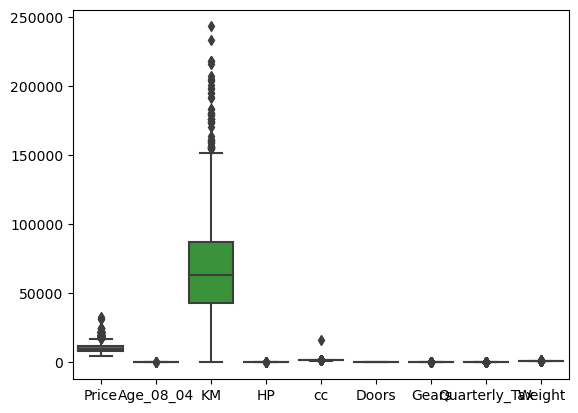

In [12]:
# Importing module for building visualizations
import seaborn as sns      
sns.boxplot(cars)

# Removing Outliers

      Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
19    16950         30  64359  110  1600      3      5             85    1105
20    15950         30  67660  110  1600      3      5             85    1105
22    15950         28  56349  110  1600      3      5             85    1120
23    16950         28  32220  110  1600      3      5             85    1120
24    16250         29  25813  110  1600      3      5             85    1120
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   8450         80  23000   86  1300      3      5             69    1015
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015

[1065 rows x 9 columns]


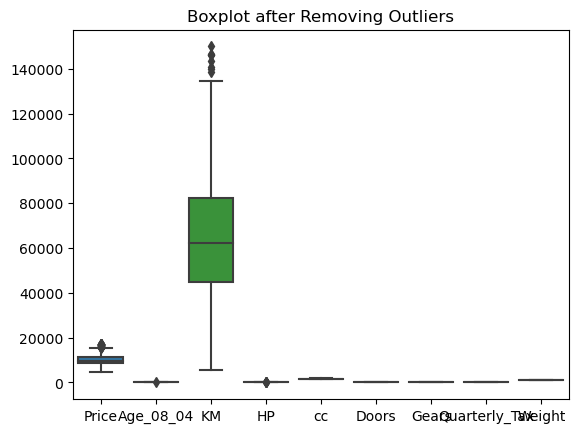

In [13]:
# Function to remove outliers using IQR
def remove_outliers_iqr(cars, variable, k=1.5):
    Q1 = cars[variable].quantile(0.25)
    Q3 = cars[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return cars[(cars[variable] >= lower_bound) & (cars[variable] <= upper_bound)]

# Removing outliers for each variable
for column in cars.columns:
    cars = remove_outliers_iqr(cars, column)

# Display the DataFrame after removing outliers
print(cars)

# Plotting the cleaned data using Seaborn
sns.boxplot(data=cars)
plt.title('Boxplot after Removing Outliers')
plt.show()

Outliers Removed

# Regression Model

In [14]:
# Importing Module
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and the target variable (y).
X = cars.drop('Price', axis=1)
y = cars['Price']

# Further split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Training Model

In [15]:
# Build and Train the Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # training it on the taining set
# fit() takes trainig data as argument and calulates the parameters on the training data

y_pred = model.predict(X_test)      # trained model
residuals = y_test - y_pred

In [16]:
# Importing model evauluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Measuring each model MSE and MAE 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import r2_score
# Calculate the R^2 value to assess the model's performance
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')

Mean Squared Error: 1214954.4057933344
Mean Absolute Error: 797.7762835335078
R^2 value: 0.7743903921291491


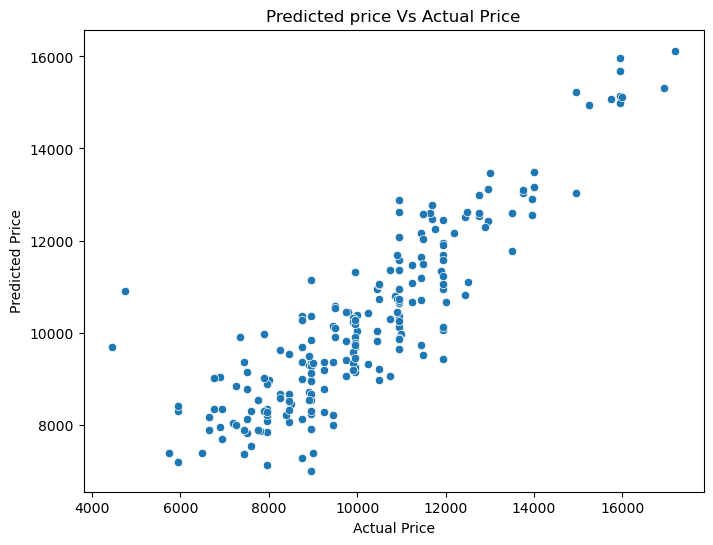

In [17]:
# Predicted Profit Vs Actual Profit
y_pred = model.predict(X_test)

# Creating scatter plot of predicted vs actual profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted price Vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [18]:
# Display the model coefficients
model.intercept_

-7640.403901479507

In [19]:
# Display the model coefficients
model.coef_

array([-1.02722283e+02, -1.34493815e-02,  1.66627140e+01, -2.10392716e+00,
       -8.55181954e+01, -5.68434189e-14, -3.75463329e+00,  2.53400600e+01])

In [21]:
# Importing Module
from scipy.stats.mstats import normaltest
normaltest(cars.Price.values)

NormaltestResult(statistic=116.26767017823718, pvalue=5.659736456790922e-26)

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# DataFrame with predictor variables
X = cars[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]

# Adding a constant to the predictor variables matrix (required for statsmodels)
X_with_const = sm.add_constant(X)     # VIF function is applied to each column in X_with_const to calculate the VIF

# Creating a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif_data)

        Variable          VIF
0      Age_08_04     1.581875
1             KM     1.365342
2             HP     6.806302
3             cc     7.589655
4          Doors     1.747019
5          Gears  4512.494745
6  Quarterly_Tax     3.829048
7         Weight     4.401665


The VIF values for 'HP', 'cc' and 'Gears' are significant, but 'Gears' still has a very high VIF, indicating strong evidence of multicollinearity.

# Residual Analysis

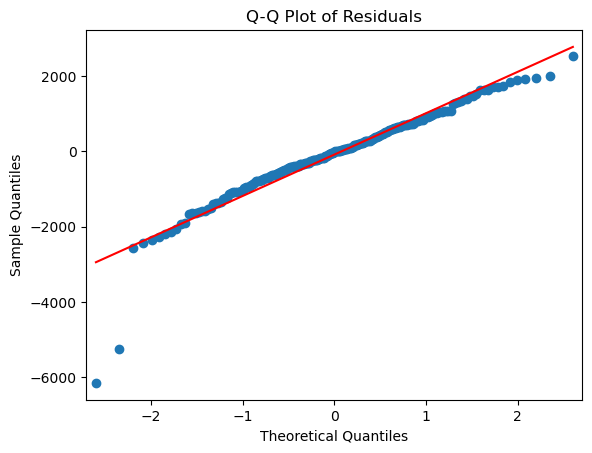

NameError: name 'stats' is not defined

In [23]:
# Creating a Q-Q plot
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
sm.qqplot(residuals, line='s')      # sm.qqplot is used to create the Q-Q plot. 
plt.title('Q-Q Plot of Residuals')  # The line='s' argument adds a standardized line to the plot.
plt.show()

# Performing a formal normality test
p_value = stats.normaltest(residuals)
print(f"Normality Test p-value: {p_value}")

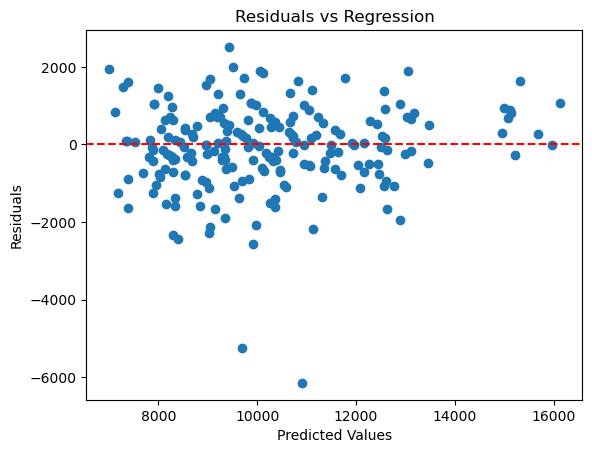

In [24]:
# Residuals vs Regression
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
# This plot checks for the presence of any patterns in the residuals, indicating non-linearity or other issues 

# Residual Plot for Homoscedasticity

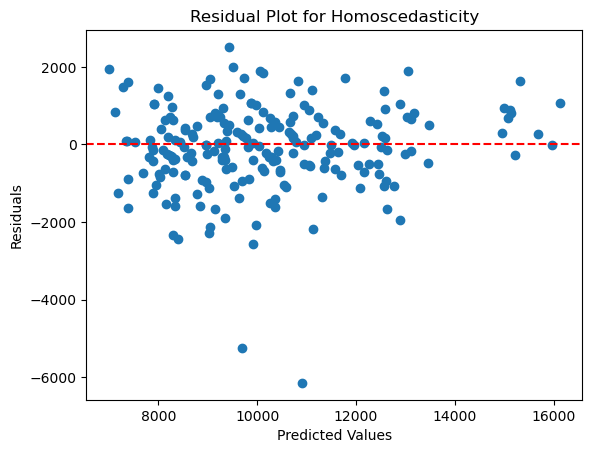

In [25]:
# Check for constant variance of residuals across different levels of the predicted values.
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [30]:
residuals = y_test - y_pred

# Create a DataFrame with predicted, actual, and residual values
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Residuals': residuals
})

# Display the table
print(results_df.head(4)) 

      Actual Price  Predicted Price   Residuals
71           12995     13464.301989 -469.301989
1178          8250      8672.356307 -422.356307
653           9950      9201.207045  748.792955
1414          7500      8132.491594 -632.491594
